### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
# Calculamos los ingresos de cada tienda y los guardamos en una lista
ingresos = [
    tienda["Precio"].sum(),
    tienda2["Precio"].sum(),
    tienda3["Precio"].sum(),
    tienda4["Precio"].sum()
]

# Imprimimos cada ingreso con su número de tienda
for i, ingreso in enumerate(ingresos, start=1):
    print(f'Ingreso total tienda {i}: ${ingreso:,.2f}')


Ingreso total tienda 1: $1,150,880,400.00
Ingreso total tienda 2: $1,116,343,500.00
Ingreso total tienda 3: $1,098,019,600.00
Ingreso total tienda 4: $1,038,375,700.00


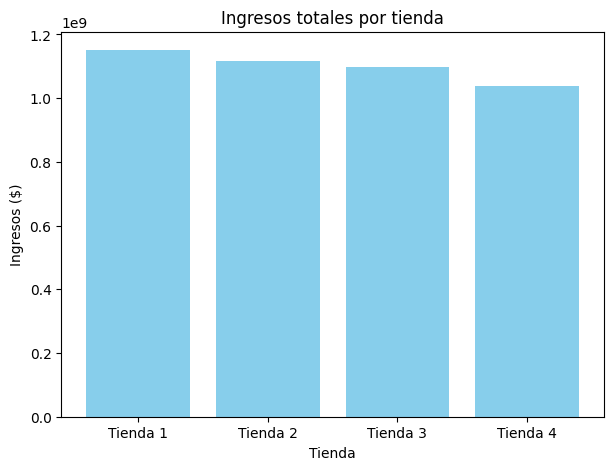

In [16]:
import matplotlib.pyplot as plt

# Ingresos por tienda
ingresos = [
    tienda["Precio"].sum(),
    tienda2["Precio"].sum(),
    tienda3["Precio"].sum(),
    tienda4["Precio"].sum()
]

plt.figure(figsize=(7,5))
plt.bar(["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], ingresos, color="skyblue")
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos ($)")
plt.xlabel("Tienda")
plt.show()


# 2. Ventas por categoría

In [8]:
# Contar categorías en cada tienda
conteo1 = tienda['Categoría del Producto'].value_counts()
conteo2 = tienda2['Categoría del Producto'].value_counts()
conteo3 = tienda3['Categoría del Producto'].value_counts()
conteo4 = tienda4['Categoría del Producto'].value_counts()

# Unir los conteos en un solo DataFrame
conteo_total = pd.concat([conteo1, conteo2, conteo3, conteo4], axis=1)

# Renombrar las columnas
conteo_total.columns = ['cantidad_t1', 'cantidad_t2', 'cantidad_t3', 'cantidad_t4']



print(conteo_total)


                         cantidad_t1  cantidad_t2  cantidad_t3  cantidad_t4
Categoría del Producto                                                     
Muebles                          465          442          499          480
Electrónicos                     448          422          451          451
Juguetes                         324          313          315          338
Electrodomésticos                312          305          278          254
Deportes y diversión             284          275          277          277
Instrumentos musicales           182          224          177          170
Libros                           173          197          185          187
Artículos para el hogar          171          181          177          201


In [9]:
total_registros = len(tienda['Categoría del Producto'])
print(total_registros)

2359


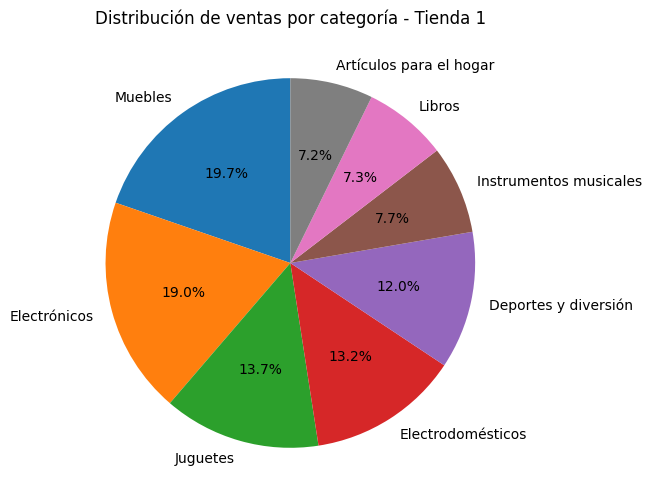

In [17]:
# Usamos Tienda 1 como ejemplo
categorias_t1 = tienda['Categoría del Producto'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(categorias_t1, labels=categorias_t1.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de ventas por categoría - Tienda 1")
plt.show()


# 3. Calificación promedio de la tienda


In [10]:
# Calificación promedio de cada tienda
promedios = [
    tienda["Calificación"].mean(),
    tienda2["Calificación"].mean(),
    tienda3["Calificación"].mean(),
    tienda4["Calificación"].mean()
]

# Imprimir resultados
for i, promedio in enumerate(promedios, start=1):
    print(f'Calificación promedio tienda {i}: {promedio:.2f}')

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


# 4. Productos más y menos vendidos


Tienda 1
   Más vendido: Microondas (60 ventas)
   Menos vendido: Auriculares con micrófono (33 ventas)


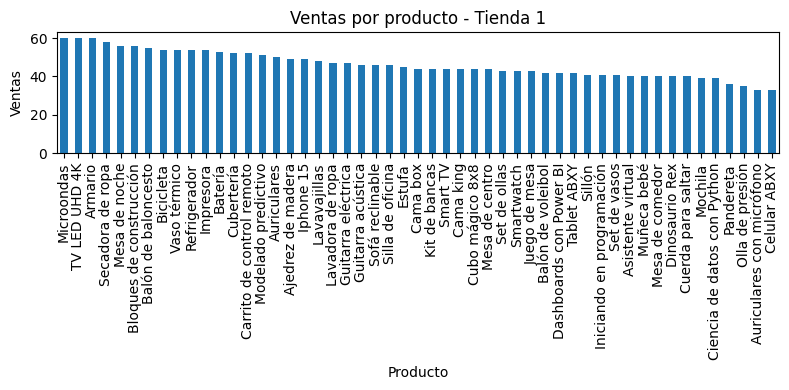


Tienda 2
   Más vendido: Iniciando en programación (65 ventas)
   Menos vendido: Juego de mesa (32 ventas)


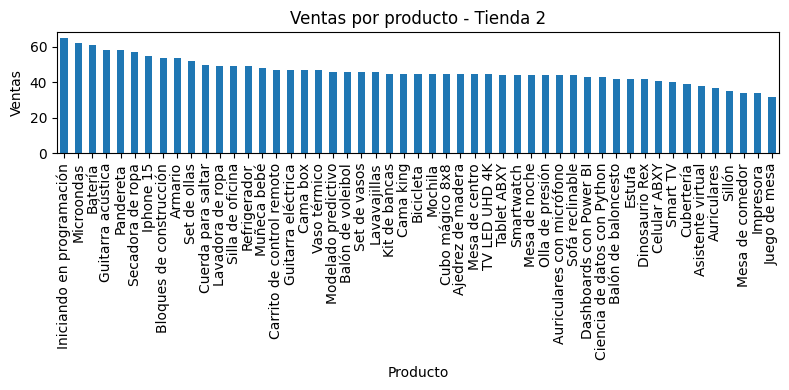


Tienda 3
   Más vendido: Kit de bancas (57 ventas)
   Menos vendido: Bloques de construcción (35 ventas)


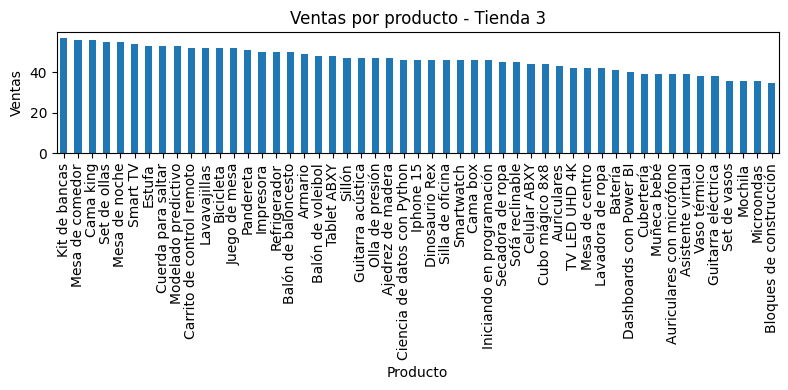


Tienda 4
   Más vendido: Cama box (62 ventas)
   Menos vendido: Guitarra eléctrica (33 ventas)


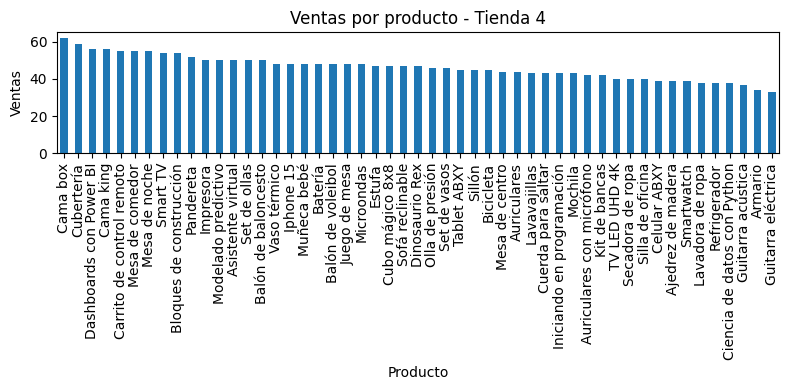

In [12]:
import matplotlib.pyplot as plt

def productos_mas_menos_vendidos(df, nombre_tienda):
    conteo = df["Producto"].value_counts()

    mas_vendido = conteo.idxmax()
    mas_vendido_cant = conteo.max()

    menos_vendido = conteo.idxmin()
    menos_vendido_cant = conteo.min()

    print(f"\n{nombre_tienda}")
    print(f"   Más vendido: {mas_vendido} ({mas_vendido_cant} ventas)")
    print(f"   Menos vendido: {menos_vendido} ({menos_vendido_cant} ventas)")

    ax = conteo.plot(kind="bar", figsize=(8,4), title=f"Ventas por producto - {nombre_tienda}")
    ax.set_ylabel("Ventas")
    plt.tight_layout()
    plt.show()

# Aplicamos a cada tienda
productos_mas_menos_vendidos(tienda, "Tienda 1")
productos_mas_menos_vendidos(tienda2, "Tienda 2")
productos_mas_menos_vendidos(tienda3, "Tienda 3")
productos_mas_menos_vendidos(tienda4, "Tienda 4")


# 5. Envío promedio por tienda

In [15]:
# Envío promedio de cada tienda
envios_promedio = [
    tienda["Costo de envío"].mean(),
    tienda2["Costo de envío"].mean(),
    tienda3["Costo de envío"].mean(),
    tienda4["Costo de envío"].mean()
]

# Imprimir resultados
for i, envio in enumerate(envios_promedio, start=1):
    print(f"Envío promedio tienda {i}: ${envio:.2f}")


Envío promedio tienda 1: $26018.61
Envío promedio tienda 2: $25216.24
Envío promedio tienda 3: $24805.68
Envío promedio tienda 4: $23459.46


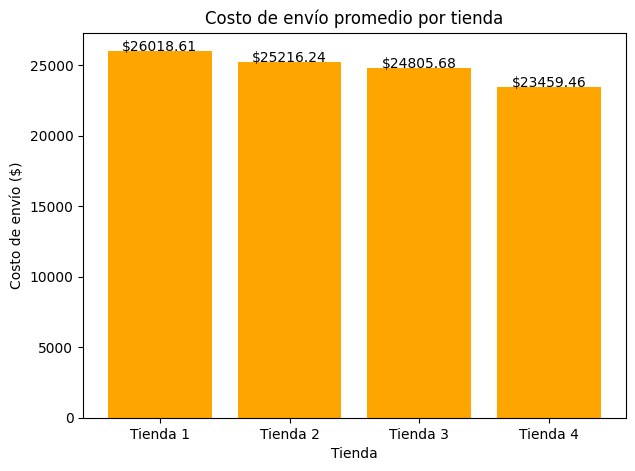

In [19]:
import matplotlib.pyplot as plt

# Calcular costo de envío promedio por tienda
envios_promedio = [
    tienda["Costo de envío"].mean(),
    tienda2["Costo de envío"].mean(),
    tienda3["Costo de envío"].mean(),
    tienda4["Costo de envío"].mean()
]

# Nombres de tiendas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Gráfico de barras
plt.figure(figsize=(7,5))
plt.bar(tiendas, envios_promedio, color="orange")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo de envío ($)")
plt.xlabel("Tienda")

# Mostrar valores encima de cada barra
for i, v in enumerate(envios_promedio):
    plt.text(i, v + 0.5, f"${v:.2f}", ha="center")

plt.show()

